In [62]:
import re
from  datetime import datetime, timedelta

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tqdm

In [63]:
X = pd.read_excel('SSDB_Raw_Data.xlsx', 'INCIDENT')
X['Date'] = X['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [64]:
X = pd.read_excel('SSDB_Raw_Data.xlsx', 'INCIDENT')
# X['year'] = X['Date'].apply(lambda d: int(d[:4]))
X['Date'] = X['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
X = X[X['Date'] >= datetime(year=2010,month=1,day=1)]
X

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI
0,20200727AZCAO,https://www.kgun9.com/news/education/man-dies-...,3,Local,4,2020-07-27,Summer,Canyon del Oro High School,Oro Valley,AZ,...,No,No,No,No,No,No,No,No,NaN,No
1,20200721SCBRO,https://abcnews4.com/news/crime-news/person-of...,2,Local,3,2020-07-21,Summer,Brookdale Elementary School,Orangeburg,SC,...,No,No,No,No,No,No,NaN,No,NaN,No
2,20200714MIWID,https://www.detroitnews.com/story/news/local/m...,1,Local,3,2020-07-14,Summer,Willow Woods Elementary School,Detroit,MI,...,No,No,No,No,No,No,No,No,NaN,No
3,20200704INLAM,https://www.abc57.com/news/murder-suspect-char...,2,Local,4,2020-07-04,Summer,Lake Hills Elementary School,Michigan City,IN,...,No,No,No,No,No,No,No,No,NaN,No
4,20200701ILFRP,https://www.dailyherald.com/news/20200714/pros...,1,Local,3,2020-07-01,Summer,Frost Elementary School,Prospect Heights,IL,...,Yes,No,No,No,No,No,Yes,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,20220605INWEG,https://abc7chicago.com/gary-indiana-shooting-...,2,Local,4,2022-06-05,Summer,West Side Leadership Academy,Gary,IN,...,NaN,No,No,No,No,No,NaN,No,99,No
2063,20220607MIPED,https://www.wxyz.com/news/shots-fired-at-persh...,4,Local,4,2022-06-07,Summer,Pershing High School,Detroit,MI,...,NaN,No,No,No,No,No,NaN,No,99,No
2064,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,NaN,No,No,No,No,No,NaN,No,99,No
2065,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [65]:
min_date, max_date = X['Date'].min(), X['Date'].max()
min_date, max_date

(Timestamp('2010-01-20 00:00:00'), Timestamp('2022-06-10 00:00:00'))

In [66]:
max_date - min_date

Timedelta('4524 days 00:00:00')

## Method A

In [67]:
DAY = timedelta(days=1)
WEEK = timedelta(weeks=1) 

shooting_date = X['Date'].sort_values()
d = min_date
last_date = max_date - WEEK

S = []
with tqdm.tqdm(total=(last_date - d).days) as pbar:
    while d < last_date:
        d_shooting = shooting_date[shooting_date > d][shooting_date <= d + WEEK]
        S.append((d, d in shooting_date.values, len(d_shooting)))
        d += DAY
        pbar.update(1)

100%|██████████| 4517/4517 [00:08<00:00, 524.59it/s] 


In [68]:
SDF = pd.DataFrame(S, columns=['date', 'shooting_occured', 'shooting_in_next_week'])
SDF

,date,shooting_occured,shooting_in_next_week
0,2010-01-20,True,0
1,2010-01-21,False,0
2,2010-01-22,False,0
3,2010-01-23,False,0
4,2010-01-24,False,0
...,...,...,...
4512,2022-05-29,True,4
4513,2022-05-30,True,3
4514,2022-05-31,True,3
4515,2022-06-01,True,3


In [69]:
s1_mean = SDF[SDF.shooting_occured].shooting_in_next_week.mean()
s2_mean = SDF[~SDF.shooting_occured].shooting_in_next_week.mean()
s1_mean, s2_mean

(3.1918678526048283, 1.2587131367292226)

In [70]:
print('Average difference in "next week shooting count" between days with/out shootings')
print(s1_mean - s2_mean)

Average difference in "next week shooting count" between days with/out shootings
1.9331547158756057


# Method B

In [71]:
DAY = timedelta(days=1)
WEEK = timedelta(weeks=1) 

shooting_date = X['Date'].sort_values()
d = min_date + WEEK
last_date = max_date

S = []
with tqdm.tqdm(total=(last_date - d).days) as pbar:
    while d < last_date:
        d_shooting = shooting_date[shooting_date < d][shooting_date >= d - WEEK]
        S.append((d, d in shooting_date.values, len(d_shooting)))
        d += DAY
        pbar.update(1)

SDF = pd.DataFrame(S, columns=['date', 'shooting_occured', 'shooting_in_prev_week'])
SDF

100%|██████████| 4517/4517 [00:04<00:00, 1014.09it/s]


,date,shooting_occured,shooting_in_prev_week
0,2010-01-27,False,1
1,2010-01-28,False,0
2,2010-01-29,False,0
3,2010-01-30,False,0
4,2010-01-31,False,0
...,...,...,...
4512,2022-06-05,True,4
4513,2022-06-06,False,4
4514,2022-06-07,True,3
4515,2022-06-08,True,3


In [72]:
s1_mean = SDF[SDF.shooting_occured].shooting_in_prev_week.mean()
s2_mean = SDF[~SDF.shooting_occured].shooting_in_prev_week.mean()
s1_mean, s2_mean

(3.159493670886076, 1.2632143815401127)

In [73]:
print('Average difference in "previous week shooting count" between days with/out shootings')
print(s1_mean - s2_mean)

Average difference in "previous week shooting count" between days with/out shootings
1.8962792893459632


## Counting victims per incident

In [74]:
victims = pd.read_excel('SSDB_Raw_Data.xlsx', 'VICTIM')

In [75]:
incident_victim_count = {}
for i, incident_victims in victims.groupby('incidentid'):
    incident_victim_count[i] = len(incident_victims)
incident_victim_count

{'19700105DCHIW': 1,
 '19700105DCSOW': 1,
 '19700105DCUNW': 1,
 '19700206OHJOC': 1,
 '19700323CADAL': 2,
 '19700415ARPIP': 6,
 '19700422DEPIW': 1,
 '19700508FLCAD': 1,
 '19700515UTBEO': 2,
 '19700828TXRIE': 1,
 '19700831FLALM': 1,
 '19700914TNHAN': 3,
 '19700924IDMEM': 1,
 '19700928IACED': 1,
 '19701005MIPOD': 4,
 '19701019TNBOM': 1,
 '19701020TNWAN': 1,
 '19701027OHAPM': 1,
 '19701120ILHAC': 2,
 '19701212WIXAA': 1,
 '19710202PAMOP': 1,
 '19710205PAJOW': 1,
 '19710210TXOAD': 2,
 '19710225OHFRC': 1,
 '19710309AZROT': 1,
 '19710405PAWIH': 1,
 '19710527MIBES': 1,
 '19710602NYEAE': 1,
 '19710820PAMOM': 1,
 '19710909TXDUL': 1,
 '19710924NYMCB': 1,
 '19710928MNCEM': 1,
 '19710929VAPEP': 3,
 '19711028MDCIB': 1,
 '19711029MDFOB': 1,
 '19711029MDFRB': 2,
 '19711103NMCAC': 1,
 '19711108OKGRT': 1,
 '19711124MDEDB': 1,
 '19711206CALOL': 4,
 '19711213MDCAB': 1,
 '19720105DCPAW': 1,
 '19720124OHSTS': 1,
 '19720126MDGWB': 1,
 '19720126MDHAB': 1,
 '19720214ILCAC': 1,
 '19720215ILKEC': 1,
 '19720228CAM

In [76]:
X['num_victims'] = X['Incident_ID'].apply(lambda _id: incident_victim_count.get(_id, 0))
X[['Incident_ID', 'num_victims']]

,Incident_ID,num_victims
0,20200727AZCAO,0
1,20200721SCBRO,1
2,20200714MIWID,1
3,20200704INLAM,1
4,20200701ILFRP,1
...,...,...
2062,20220605INWEG,2
2063,20220607MIPED,0
2064,20220608ARLIL,0
2065,20220609ALWAG,1


Avg. number of victims: 1.3027079303675049


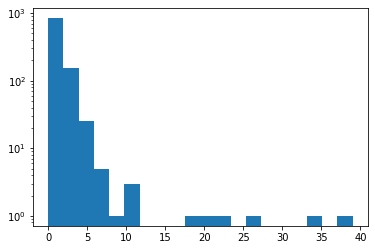

In [77]:
print("Avg. number of victims:", X.num_victims.mean())

plt.hist(X['num_victims'], bins=20, log=True)
plt.show()

In [78]:
(X['num_victims'] >= 2).sum()

196

## Handling missing values

In [79]:
X['num_news'] = X['Number_News'].replace({
    '1': '1-5', '2': '1-5', '3': '1-5', '4': '1-5', '5': '1-5',
    '6': '5-10', '10': '5-10', 
    '11': '11-100', '20': '11-100', '50': '11-100', '99': '11-100', '100': '11-100',
    '999': '100+', '500': '100+'
})
X['num_news'].unique()

array(['1-5', nan, '11-100', '5-10', '100+'], dtype=object)

In [80]:
X[X['num_news'].isna()]

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,num_victims,num_news
9,20200603IAGAD,https://www.ourquadcities.com/news/local-news/...,NaN,NaN,4,2020-06-03,Summer,Garfield Elementary School,Davenport,IA,...,No,No,No,No,NaN,No,>10,No,1,NaN
10,20200527OHLUC,https://www.cleveland.com/metro/2020/05/man-sh...,NaN,NaN,3,2020-05-27,Spring,Luis Munoz Marin Middle School,Cleveland,OH,...,No,No,No,No,No,No,NaN,No,1,NaN
11,20200525ALORM,https://www.fox10tv.com/news/mpd-makes-arrest-...,NaN,NaN,3,2020-05-25,Spring,O Rourke Elementary School,Mobile,AL,...,No,No,No,No,No,No,NaN,No,3,NaN
12,20200522OHMIC,https://fox8.com/news/man-killed-in-shooting-n...,NaN,NaN,2,2020-05-22,Spring,Miles Elementary School,Cleveland,OH,...,No,No,No,No,NaN,No,NaN,No,1,NaN
13,20200519VAWEM,https://patch.com/virginia/manassas/suspect-ma...,NaN,NaN,3,2020-05-19,Spring,West Gate Elementary School,Manassas,VA,...,No,No,No,No,No,No,<10,No,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,20200917OHELA,https://www.news5cleveland.com/news/local-news...,NaN,Local,4,2020-09-17,Fall,Ellet High School,Akron,OH,...,No,No,No,No,NaN,No,NaN,No,2,NaN
1602,20130129ALDAM,https://www.al.com/montgomery/2013/02/jimmy_le...,NaN,International,5,2013-01-29,Winter,Dale County School Bus,Midland City,AL,...,No,No,No,No,No,Yes,5,No,1,NaN
1629,20160928TNSYP,https://www.scadvocate.com/2016/10/11/armed-st...,NaN,National,5,2016-09-28,Fall,Sycamore Middle School,Pleasant View,TN,...,No,No,NaN,No,No,Yes,0,No,0,NaN
1881,20211201TXSAP,https://www.khou.com/article/news/crime/armed-...,NaN,Local,4,2021-12-01,Winter,Sam Rayburn High School,Pasadena,TX,...,No,No,No,No,No,No,1,No,1,NaN


In [81]:
X['Situation'].value_counts()

Escalation of Dispute                     321
Drive-by Shooting                          96
Accidental                                 92
Illegal Activity                           76
Suicide/Attempted                          56
Indiscriminate Shooting                    47
Unknown                                    46
Domestic w/ Targeted Victim                45
Intentional Property Damage                43
Hostage/Standoff                           12
Psychosis                                  10
Bullying                                    9
Officer-Involved Shooting                   7
Self-defense                                6
Anger Over Grade/Suspension/Discipline      5
Murder/Suicide                              3
Name: Situation, dtype: int64

In [82]:
X['num_sources'] = X['Sources'].str.split(' ').apply(lambda x:len(x))
X[['num_sources', 'num_news']]

,num_sources,num_news
0,2,1-5
1,3,1-5
2,1,1-5
3,2,1-5
4,1,1-5
...,...,...
2062,2,1-5
2063,3,1-5
2064,2,1-5
2065,5,11-100


In [83]:
X['num_news'].value_counts()

1-5       449
5-10      126
11-100     83
100+        9
Name: num_news, dtype: int64

<AxesSubplot:>

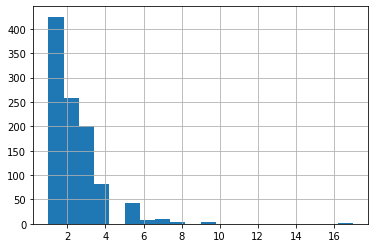

In [84]:
X['num_sources'].hist(bins=20)

In [85]:
def apply_num_news_range(i):
    # '1-5', '11-100', '5-10', '100+'
    if i < 5:
        return '1-5'
    
    if i >= 5 and i <= 10:
        return '5-10'

    if i > 10 and i <= 100:
        return '11-100'

    if i > 100:
        return '100+'

for i, row in X[X['Number_News'].isna()].iterrows():
    X.at[i, 'num_news'] = apply_num_news_range(row['num_sources'])

X['num_news'].unique()

array(['1-5', '5-10', '11-100', '100+'], dtype=object)

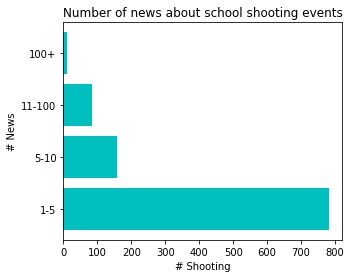

In [86]:
num_news = X['num_news'].value_counts()
plt.figure(figsize=(5,4))
plt.title('Number of news about school shooting events')
plt.barh(num_news.index, num_news.values, align='center', color='c')
plt.xlabel('# Shooting')
plt.ylabel('# News')
# plt.xticks(range(0,500, 50))
plt.show()

In [87]:
X[['num_news', 'Media_Attention']].value_counts()

num_news  Media_Attention
1-5       Local              419
5-10      Local               58
          Regional            57
11-100    National            56
1-5       Regional            31
11-100    Regional            13
1-5       National            12
5-10      National            12
11-100    International       11
100+      International        8
11-100    Local                3
5-10      International        3
1-5       International        1
100+      National             1
dtype: int64

In [88]:
X[['Media_Attention', 'num_victims']].groupby('Media_Attention').mean()

,num_victims
Media_Attention,
International,5.347826
Local,0.875000
National,2.592593
Regional,1.267327


## Estimating ATE using covariate adjustment

In [89]:
x = pd.DataFrame(X['Incident_ID'])

x['treatment'] = (X['num_victims'] >= 2) * 1

x['high_coverage'] = (X['num_news'] != '1-5') * 1
x['active_shooter_by_fbi'] = (X['Active_Shooter_FBI'] == 'Yes') * 1
x['gang_related'] = (X['Gang_Related'] == 'Yes') * 1
x['preplanned'] = (X['Preplanned'] == 'Yes') * 1
x['bullied'] = (X['Bullied'] == 'Yes') * 1
x['domestic_violence'] = (X['Domestic_Violence'] == 'Yes') * 1
x['incidents_with_accomplice'] = (X['Accomplice'] == 'Yes') * 1

x['high_school'] = (X['School_Level'] == 'High') * 1
x['middle_school'] = (X['School_Level'] == 'Middle') * 1
x['elementry_school'] = (X['School_Level'] == 'Elementary') * 1

x['in_school'] = (X['Location_Type'].isin(["Inside School Building", "Both Inside/Outside"])) * 1
x['out_school'] = (X['Location_Type'].isin(["Outside on School Property", "Off School Property", "Both Inside/Outside"])) * 1
x['school_bus'] = (X['Location_Type'] == "School Bus") * 1
x['during_school'] = (X['During_School'] == "Yes") * 1
x['is_summer_time'] = (X['Date'].apply(lambda d: d.month in [6,7,8])) * 1
x['targeted'] = (X['Targets'].isin(["Victims Targeted", "Both"])) * 1
x['random_shooting'] = (X['Targets'].isin(["Random Shooting", "Both"])) * 1

for s in X['Situation'].dropna().unique().tolist():
    x['situation_' + re.sub('\W', '_', s).lower()] = (X['Situation'] == s) * 1

x.set_index('Incident_ID', drop=True, inplace=True)

# x.reset_index(drop=True, inplace=True)

x

,treatment,high_coverage,active_shooter_by_fbi,gang_related,preplanned,bullied,domestic_violence,incidents_with_accomplice,high_school,middle_school,...,situation_indiscriminate_shooting,situation_suicide_attempted,situation_domestic_w__targeted_victim,situation_self_defense,situation_bullying,situation_hostage_standoff,situation_anger_over_grade_suspension_discipline,situation_murder_suicide,situation_psychosis,situation_officer_involved_shooting
Incident_ID,,,,,,,,,,,,,,,,,,,,,
20200727AZCAO,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20200721SCBRO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20200714MIWID,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20200704INLAM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20200701ILFRP,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220605INWEG,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20220607MIPED,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20220608ARLIL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
DAY = timedelta(days=1)
WEEK = timedelta(weeks=1) 

x['next_week_events'] = None

for i, row in X.iterrows():
    incident_id = row['Incident_ID']
    d = row['Date']
    num_next_week_events = len(X[X['Date'] > d][X['Date'] <= d + WEEK])
    x.at[incident_id, 'next_week_events'] = num_next_week_events

x

/var/folders/wd/57_v9c5142x7mhyp18nb4bt80000gn/T/ipykernel_22614/3448359975.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_next_week_events = len(X[X['Date'] > d][X['Date'] <= d + WEEK])


,treatment,high_coverage,active_shooter_by_fbi,gang_related,preplanned,bullied,domestic_violence,incidents_with_accomplice,high_school,middle_school,...,situation_suicide_attempted,situation_domestic_w__targeted_victim,situation_self_defense,situation_bullying,situation_hostage_standoff,situation_anger_over_grade_suspension_discipline,situation_murder_suicide,situation_psychosis,situation_officer_involved_shooting,next_week_events
Incident_ID,,,,,,,,,,,,,,,,,,,,,
20200727AZCAO,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
20200721SCBRO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20200714MIWID,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20200704INLAM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20200701ILFRP,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20220605INWEG,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
20220607MIPED,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
20220608ARLIL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [91]:
def get_ci(v):
    mid = np.mean(v)
    se = np.std(v) / np.sqrt(len(v))
    return (mid - 1.96*se, mid + 1.96*se)

### Unadjusted ATE estimation

In [92]:
y1_est = x[x['treatment']==1]['next_week_events'].mean()
y0_est = x[x['treatment']==0]['next_week_events'].mean()

unadjusted_ate = y1_est - y0_est

print('unadjusted ATE:', y1_est - y0_est)

unadjusted ATE: -0.016742974039257952


In [93]:
# Using bootstrap

unadjusted_ates = []

B = 100
sample_size = 500

for i in range(B):
    sample = x.sample(sample_size)
    y1_est = sample[sample['treatment']==1]['next_week_events'].mean()
    y0_est = sample[sample['treatment']==0]['next_week_events'].mean()
    unadjusted_ates.append(y1_est - y0_est)


get_ci(unadjusted_ates)

(-0.09117257032734248, 0.054203305889245504)

### S-Learner

In [94]:
from sklearn.linear_model import LinearRegression

target_label = 'next_week_events'
features = list(x.columns)
features.remove(target_label)

X_train, y_train = x[features], x[target_label]

reg = LinearRegression()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_train)

L1_error = ((y_train - y_predict).abs()).mean()
print("L1_error:", L1_error)

x_do_1, x_do_0 = X_train.copy(), X_train.copy()
x_do_1['treatment'] = 1
x_do_0['treatment'] = 0

y_predict_do_1 = reg.predict(x_do_1)
y_predict_do_0 = reg.predict(x_do_0)

s_learner_lin_reg_ate = (y_predict_do_1 - y_predict_do_0).mean()

print('ATE estimation:', (y_predict_do_1 - y_predict_do_0).mean())

L1_error: 2.834555279266738
ATE estimation: -0.09420729409245923


In [95]:
# S-learner/Linear regression ATE estimation using bootstrap

s_learner_lin_reg_ates = []
for i in range(100):
    sample = x.sample(500)
    X_train, y_train = sample[features], sample[target_label]

    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_predict = reg.predict(X_train)

    x_do_1, x_do_0 = X_train.copy(), X_train.copy()
    x_do_1['treatment'] = 1
    x_do_0['treatment'] = 0

    y_predict_do_1 = reg.predict(x_do_1)
    y_predict_do_0 = reg.predict(x_do_0)

    s_learner_lin_reg_ates.append((y_predict_do_1 - y_predict_do_0).mean())

ci = get_ci(s_learner_lin_reg_ates)
np.mean(ci), ci

(-0.08054209205344881, (-0.15565081441061057, -0.005433369696287063))

In [96]:
from sklearn.tree import DecisionTreeRegressor

X_train, y_train = x[features], x[target_label]

reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_train)

x_do_1, x_do_0 = X_train.copy(), X_train.copy()
x_do_1['treatment'] = 1
x_do_0['treatment'] = 0

y_predict_do_1 = reg.predict(x_do_1)
y_predict_do_0 = reg.predict(x_do_0)

s_learner_dec_tree_ate = (y_predict_do_1 - y_predict_do_0).mean()

print("ATE:", (y_predict_do_1 - y_predict_do_0).mean())

ATE: -0.07912637008381687


In [97]:
# S-learner / Decision tree ATE Estimation using bootstrap

s_learner_dec_tree_ates = []

for i in range(100):
    sample = x.sample(500)
    X_train, y_train = sample[features], sample[target_label]

    reg = DecisionTreeRegressor()
    reg.fit(X_train, y_train)
    y_predict = reg.predict(X_train)

    x_do_1, x_do_0 = X_train.copy(), X_train.copy()
    x_do_1['treatment'] = 1
    x_do_0['treatment'] = 0

    y_predict_do_1 = reg.predict(x_do_1)
    y_predict_do_0 = reg.predict(x_do_0)

    s_learner_dec_tree_ates.append((y_predict_do_1 - y_predict_do_0).mean())

ci = get_ci(s_learner_dec_tree_ates)
np.mean(ci), ci

(-0.15191559884559885, (-0.26150700865256826, -0.04232418903862947))

### T-Learner

Using linear regression

In [98]:
t_learner_features = features.copy()
t_learner_features.remove('treatment')

# y=f(X) for treatment=1
x_high = x[x.treatment == 1]
x_high_train, y_high_train = x_high[t_learner_features], x_high[target_label]

reg_high = LinearRegression()
reg_high.fit(x_high_train, y_high_train)

# y=f(X) for treatment=0
x_low = x[x.treatment == 0]
x_low_train, y_low_train = x_low[t_learner_features], x_low[target_label]

reg_low = LinearRegression()
reg_low.fit(x_low_train, y_low_train)

# estimate using f1
y1 = reg_high.predict(x[t_learner_features])

# estimate using f0
y0 = reg_low.predict(x[t_learner_features])

t_learner_lin_reg_ate = (y1 - y0).mean()

print('ATE estimation:', (y1 - y0).mean())

ATE estimation: -0.3553090561047784


In [99]:
# T-learner, linear regression, ATE estimation using bootstrap

t_learner_lin_reg_ates = []

for i in range(100):
    sample = x.sample(500)
        
    # y=f(X) for treatment=1
    x_high = sample[sample.treatment == 1]
    x_high_train, y_high_train = x_high[t_learner_features], x_high[target_label]

    reg_high = LinearRegression()
    reg_high.fit(x_high_train, y_high_train)

    # y=f(X) for treatment=0
    x_low = sample[sample.treatment == 0]
    x_low_train, y_low_train = x_low[t_learner_features], x_low[target_label]

    reg_low = LinearRegression()
    reg_low.fit(x_low_train, y_low_train)

    # estimate using f1
    y1 = reg_high.predict(sample[t_learner_features])

    # estimate using f0
    y0 = reg_low.predict(sample[t_learner_features])

    t_learner_lin_reg_ates.append((y1 - y0).mean())

ci = get_ci(t_learner_lin_reg_ates)
np.mean(ci), ci

(-0.1623688918465534, (-0.2586620689612762, -0.06607571473183059))

Using desicion trees

In [100]:
reg_high = DecisionTreeRegressor()
reg_high.fit(x_high_train, y_high_train)

reg_low = DecisionTreeRegressor()
reg_low.fit(x_low_train, y_low_train)

# estimate using f1
y1 = reg_high.predict(x[t_learner_features])

# estimate using f0
y0 = reg_low.predict(x[t_learner_features])

t_learner_dec_tree_ate = (y1 - y0).mean()

print('ATE estimation:', (y1 - y0).mean())

ATE estimation: 0.7635120198949987


In [101]:
# T-learner, decision trees, ATE estimation using bootstrap

t_learner_dec_tree_ates = []

for i in range(100):
    # y=f(X) for treatment=1
    x_high = sample[sample.treatment == 1]
    x_high_train, y_high_train = x_high[t_learner_features], x_high[target_label]

    # y=f(X) for treatment=0
    x_low = sample[sample.treatment == 0]
    x_low_train, y_low_train = x_low[t_learner_features], x_low[target_label]
    
    sample = x.sample(500)
    reg_high = DecisionTreeRegressor()
    reg_high.fit(x_high_train, y_high_train)

    reg_low = DecisionTreeRegressor()
    reg_low.fit(x_low_train, y_low_train)

    # estimate using f1
    y1 = reg_high.predict(sample[t_learner_features])

    # estimate using f0
    y0 = reg_low.predict(sample[t_learner_features])

    t_learner_dec_tree_ates.append((y1 - y0).mean())

ci = get_ci(t_learner_dec_tree_ates)
np.mean(ci), ci

(0.11567500049950047, (-0.03869854236554687, 0.2700485433645478))

### IPW & Propensity estimation

$ e(x) = P(T=1 | x) $


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

p_target_label = "treatment"
p_features = features.copy()
p_features.remove(p_target_label)

p_reg = LogisticRegression()
p_reg.fit(x[p_features], x[p_target_label])
treatment_predict = p_reg.predict(x[p_features])

print("Propensity score training accuracy:", metrics.accuracy_score(x[p_target_label], treatment_predict))
print("Propensity score training recall:", metrics.recall_score(x[p_target_label], treatment_predict))
print("Propensity score training precision:", metrics.precision_score(x[p_target_label], treatment_predict))

Propensity score training accuracy: 0.8549323017408124
Propensity score training recall: 0.37244897959183676
Propensity score training precision: 0.73


Adjustment:

$ \hat{ATE} = {{1} \over {n}} \Sigma {  {{t_i \cdot y_i} \over {e(x_i)}} - {{(1-t_i) \cdot y_i} \over {1-e(x_i)}}  }  $

In [103]:
# propensity
p = p_reg.predict_proba(x[p_features])[:,1]

# treatment
t = x["treatment"]

# outcome
y = x["next_week_events"]

ate_ipw_est = np.mean(t * y / p - (1-t) * y / (1-p))
print("Estimated ATE using IPW:", ate_ipw_est)

Estimated ATE using IPW: -0.17689753096518332


In [104]:
# Estimating ATE using IPW and bootstrap
ipw_ates = []

for i in range(100):
    sample = x.sample(500)
    p = p_reg.predict_proba(sample[p_features])[:,1]
    t = sample["treatment"]
    y = sample["next_week_events"]
    ipw_ates.append(np.mean(t * y / p - (1-t) * y / (1-p)))

ci = get_ci(ipw_ates)
np.mean(ci), ci

(-0.1374621866987174, (-0.27291703513681675, -0.00200733826061808))

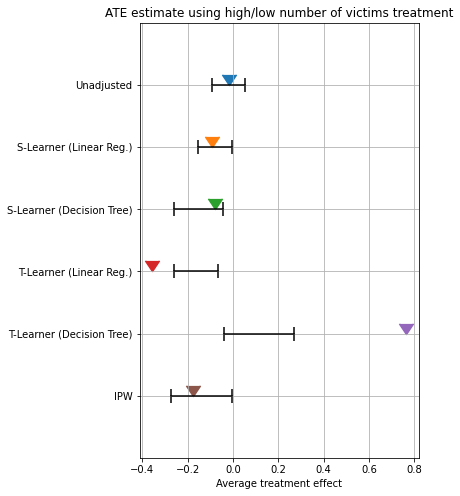

In [107]:
plt.figure(figsize=(5,8))
plt.title("ATE estimate using high/low number of victims treatment")

# bootstrap
# unadjusted_ates
# s_learner_lin_reg_ates
# s_learner_dec_tree_ates
# t_learner_lin_reg_ates
# t_learner_dec_tree_ates
# ipw_ates

ci = get_ci(unadjusted_ates)
plt.scatter([unadjusted_ate], [5], marker=7, s=200)
plt.scatter(ci, [5,5], marker="|", c='black', s=200)
plt.plot(ci, [5,5], c='black')

ci = get_ci(s_learner_lin_reg_ates)
plt.scatter([s_learner_lin_reg_ate], [4], marker=7, s=200)
plt.scatter(ci, [4,4], marker="|", c='black', s=200)
plt.plot(ci, [4,4], c='black')

ci = get_ci(s_learner_dec_tree_ates)
plt.scatter([s_learner_dec_tree_ate], [3], marker=7, s=200)
plt.scatter(ci, [3,3], marker="|", c='black', s=200)
plt.plot(ci, [3,3], c='black')

ci = get_ci(t_learner_lin_reg_ates)
plt.scatter([t_learner_lin_reg_ate], [2], marker=7, s=200)
plt.scatter(ci, [2,2], marker="|", c='black', s=200)
plt.plot(ci, [2,2], c='black')

ci = get_ci(t_learner_dec_tree_ates)
plt.scatter([t_learner_dec_tree_ate], [1], marker=7, s=200)
plt.scatter(ci, [1,1], marker="|", c='black', s=200)
plt.plot(ci, [1,1], c='black')

ci = get_ci(ipw_ates)
plt.scatter([ate_ipw_est], [0], marker=7, s=200)
plt.scatter(ci, [0,0], marker="|", c='black', s=200)
plt.plot(ci, [0,0], c='black')

plt.xlabel("Average treatment effect")

plt.yticks(range(5+1), ['IPW', 'T-Learner (Decision Tree)', 'T-Learner (Linear Reg.)', 'S-Learner (Decision Tree)', 'S-Learner (Linear Reg.)', 'Unadjusted'])
plt.ylim((-1, 6))
plt.grid(True, "both")

plt.show()

In [106]:
x.columns

Index(['treatment', 'high_coverage', 'active_shooter_by_fbi', 'gang_related',
       'preplanned', 'bullied', 'domestic_violence',
       'incidents_with_accomplice', 'high_school', 'middle_school',
       'elementry_school', 'in_school', 'out_school', 'school_bus',
       'during_school', 'is_summer_time', 'targeted', 'random_shooting',
       'situation_accidental', 'situation_escalation_of_dispute',
       'situation_illegal_activity', 'situation_drive_by_shooting',
       'situation_intentional_property_damage', 'situation_unknown',
       'situation_indiscriminate_shooting', 'situation_suicide_attempted',
       'situation_domestic_w__targeted_victim', 'situation_self_defense',
       'situation_bullying', 'situation_hostage_standoff',
       'situation_anger_over_grade_suspension_discipline',
       'situation_murder_suicide', 'situation_psychosis',
       'situation_officer_involved_shooting', 'next_week_events'],
      dtype='object')